## Import dependencies

In [1]:
from landlab.io import read_esri_ascii
import pandas as pd
import landlab
from landlab import Component, RasterModelGrid
from landlab.io.esri_ascii import write_esri_ascii 

In [2]:
# Linhas do cabeçalho, 6 primeiras
header_rows = 6

# Separar cabeçalho da imagem

#ASCII: todas as linhas restantes
df = pd.read_csv("bacia_piratini_90m.asc", header=None, delim_whitespace=True, skiprows=header_rows)

#Cabeçalho
df_h = pd.read_csv("bacia_piratini_90m.asc", header=None, delim_whitespace=True, nrows=header_rows)

In [3]:
df_h #informaçao do cabeçalho

,0,1
0,ncols,1267
1,nrows,987
2,xllcorner,0
3,yllcorner,0
4,cellsize,90
5,NODATA_value,-9999


## Grid vazia

In [4]:
x = 200 # x do ponto inicial do retangulo,ponto inferior esquerdo (localizaçao do crop)
y = 210 #y do ponto inicial do retangulo,ponto inferior esquerdo

h = 10 #altura do retangulo (crop)
w = 10 #largura do crop (retangulo)


new_df = df.loc[x+1:x+w, y+1:y+h] #croping image


grid = RasterModelGrid((w, h), xy_spacing=10.) #criando DEM vazio do mesmo tamanho do crop p receber o crop
grid.add_field("topographic__elevation", new_df, at="node", copy=True, clobber=False) # adicionando o grid cropado ao dem criado

array([384, 379, 375, 371, 362, 358, 344, 340, 337, 344, 381, 375, 371,
       363, 358, 355, 344, 336, 341, 348, 383, 374, 366, 358, 353, 351,
       338, 343, 347, 356, 375, 370, 365, 359, 357, 351, 340, 349, 358,
       366, 379, 376, 376, 369, 357, 346, 343, 355, 363, 368, 380, 379,
       374, 364, 354, 346, 347, 360, 366, 371, 378, 373, 365, 358, 349,
       346, 353, 360, 370, 370, 370, 366, 359, 351, 344, 352, 356, 360,
       370, 361, 363, 359, 358, 351, 349, 352, 359, 365, 369, 355, 360,
       359, 358, 353, 352, 352, 358, 355, 354, 342])

In [5]:
df1 = df.copy() # fazendo uma copia para criar a mascara
df1.loc[x+1:x+w, y+1:y+h] = 0 #cria uma mascara com as dimensóes do crop

In [6]:
df.shape

(987, 1267)

## Compare ASCs

In [1]:
(mg, z) = read_esri_ascii("20_grain_type.asc", name="topographic__elevation")

NameError: name 'read_esri_ascii' is not defined

In [8]:
mg.add_field("occ_topographic__elevation", df1, at="node", copy=True, clobber=False)

array([293, 287, 279, ...,   5,   4,   6])

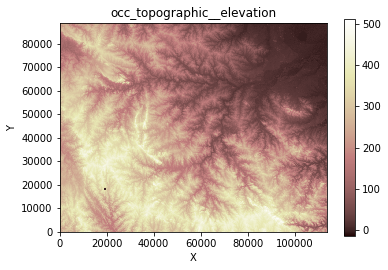

In [9]:
landlab.plot.imshow.imshow_grid_at_node(mg,'occ_topographic__elevation')

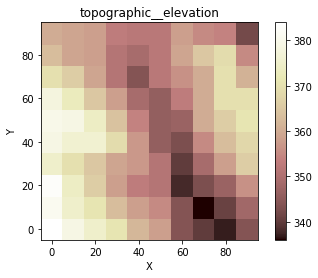

In [10]:
#crop
landlab.plot.imshow.imshow_grid_at_node(grid,'topographic__elevation')

## Save new ASC II

In [11]:
new_df.to_csv('bacia_piratini_90m_csv.asc', header=None, sep='\t', encoding = 'utf-8')

In [12]:
write_esri_ascii("./save_asc/ascii_crop_10_10.asc", grid) #salva DEM no formato ASCII, salva um arquivo por grid (grid eh o DEM)

['./save_asc/ascii_crop_10_10.asc']